Importing all necessary library

In [1]:
import openpyxl as os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import seaborn as sns

Dataset

In [2]:
data = pd.read_csv("Bike-Sales-Dashboard.csv")
print(data)

        ID Martial Status  Gender    Income  Children        Education  \
0    12496        Married  Female   $40,000         1        Bachelors   
1    24107        Married    Male   $30,000         3  Partial College   
2    14177        Married    Male   $80,000         5  Partial College   
3    24381         Single    Male   $70,000         0        Bachelors   
4    25597         Single    Male   $30,000         0        Bachelors   
..     ...            ...     ...       ...       ...              ...   
995  23731        Married    Male   $60,000         2      High School   
996  28672         Single    Male   $70,000         4  Graduate Degree   
997  11809        Married    Male   $60,000         2        Bachelors   
998  19664         Single    Male  $100,000         3        Bachelors   
999  12121         Single    Male   $60,000         3      High School   

         Occupation Home Owner  Cars    Commute Distance         Region  Age  \
0    Skilled Manual        Yes 

In [3]:
## Handle missing values (if any)
# Assuming numerical columns: Fill missing values with mean
# Assuming categorical columns: Fill missing values with mode
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].mean(), inplace=True)

print("\nMissing Values After Handling:")
print(data.isnull().sum())


Missing Values After Handling:
ID                  0
Martial Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Age Brackets        0
Purchased Bike      0
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_15716\361213348.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_15716\361213348.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

Rijia Parveen Raya

In [4]:
numerical_columns = data.select_dtypes(include=[np.number])
descriptive_stats = numerical_columns.describe()
print("\nDescriptive Statistics:")
print(descriptive_stats)


Descriptive Statistics:
                 ID     Children         Cars          Age
count   1000.000000  1000.000000  1000.000000  1000.000000
mean   19965.992000     1.898000     1.442000    44.163000
std     5347.333948     1.628572     1.125123    11.364488
min    11000.000000     0.000000     0.000000    25.000000
25%    15290.750000     0.000000     1.000000    35.000000
50%    19744.000000     2.000000     1.000000    43.000000
75%    24470.750000     3.000000     2.000000    52.000000
max    29447.000000     5.000000     4.000000    89.000000


In [5]:
target_counts = data['Purchased Bike'].value_counts()
balance_percentage = (target_counts / len(data)) * 100
print("\nBalance Percentage:")
print(balance_percentage)


Balance Percentage:
Purchased Bike
No     51.9
Yes    48.1
Name: count, dtype: float64


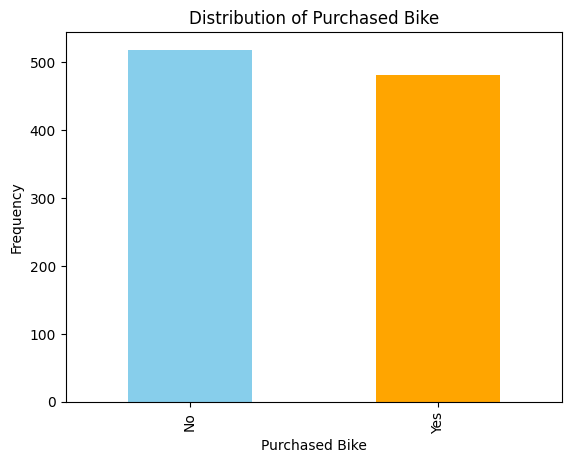

In [6]:
target_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Purchased Bike')
plt.xlabel('Purchased Bike')
plt.ylabel('Frequency')
plt.show()

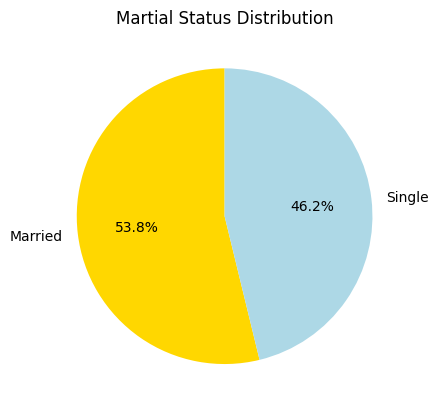

In [7]:
data['Martial Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gold', 'lightblue'])
plt.title('Martial Status Distribution')
plt.ylabel('')
plt.show()

Sheikh Sarafat Hossain

In [8]:
# Convert 'Purchased Bike' column to numeric (Yes = 1, No = 0)
data['Purchased Bike'] = data['Purchased Bike'].map({'Yes': 1, 'No': 0})

Plot Age vs. Proportion of Bike Purchase (Remove Standard Error)

C:\Users\HP\AppData\Local\Temp\ipykernel_15716\2514480696.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age', y='Purchased Bike', data=data, estimator=np.mean, ci=None)


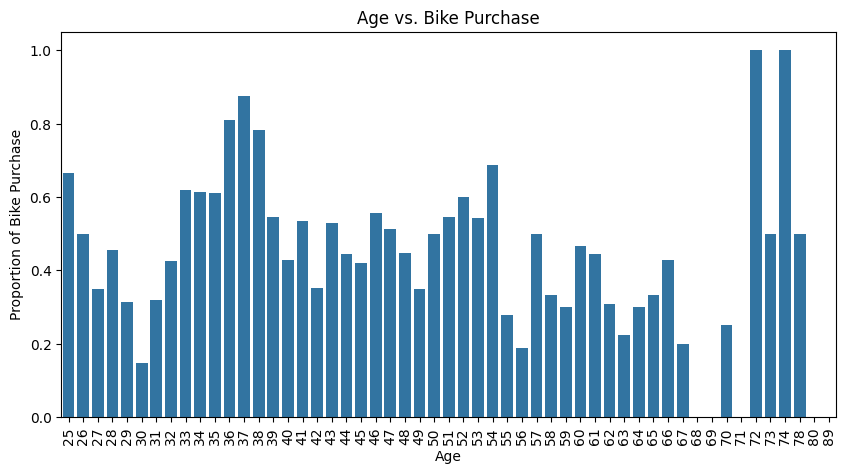

In [20]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Age', y='Purchased Bike', data=data, estimator=np.mean, ci=None)
plt.xlabel('Age')
plt.ylabel('Proportion of Bike Purchase')
plt.title('Age vs. Bike Purchase')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

Plot Income vs. Proportion of Bike Purchase (Remove Standard Error)

C:\Users\HP\AppData\Local\Temp\ipykernel_15716\2672233197.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Income', y='Purchased Bike', data=data, estimator=np.mean,ci=None)


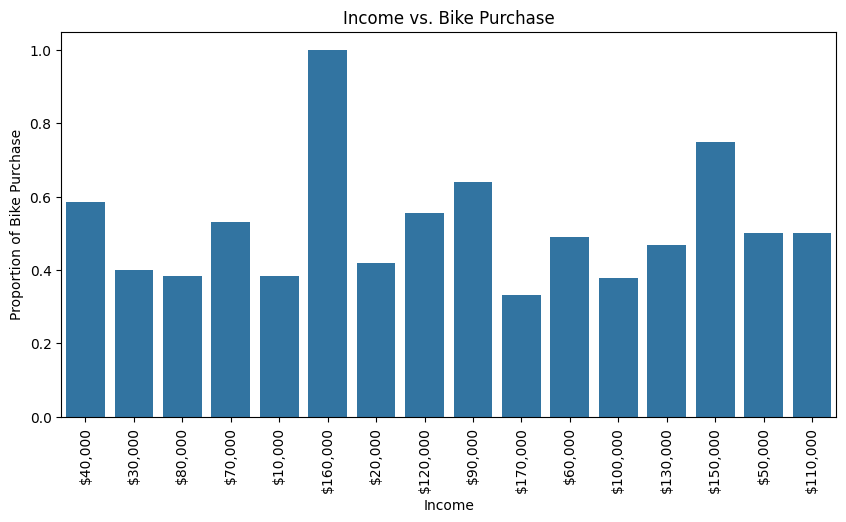

In [21]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Income', y='Purchased Bike', data=data, estimator=np.mean,ci=None)
plt.xlabel('Income')
plt.ylabel('Proportion of Bike Purchase')
plt.title('Income vs. Bike Purchase')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

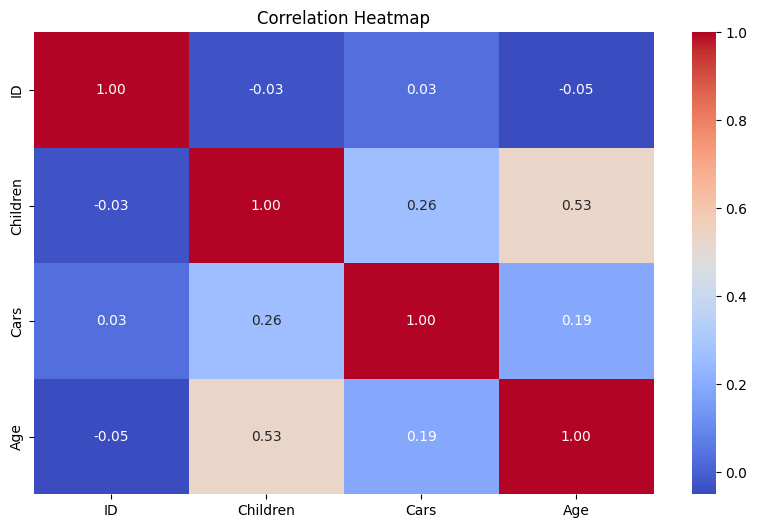

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
## Convert categorical data to numerical
categorical_columns = data.select_dtypes(include=['object'])
encoded_data = pd.get_dummies(data, drop_first=True)
print("\nEncoded Data Sample:")
print(encoded_data.head())


Encoded Data Sample:
      ID  Children  Cars  Age  Purchased Bike  Martial Status_Single  \
0  12496         1     0   42               0                  False   
1  24107         3     1   43               0                  False   
2  14177         5     2   60               0                  False   
3  24381         0     1   41               1                   True   
4  25597         0     0   36               1                   True   

   Gender_Male  Income_$100,000  Income_$110,000  Income_$120,000  ...  \
0        False            False            False            False  ...   
1         True            False            False            False  ...   
2         True            False            False            False  ...   
3         True            False            False            False  ...   
4         True            False            False            False  ...   

   Occupation_Skilled Manual  Home Owner_Yes  Commute Distance_1-2 Miles  \
0                       

Train-Test Split

In [13]:
#Train-Test Split
X = encoded_data.drop('Purchased Bike', axis=1)  # Assuming 'Purchased Bike_Yes' is the target
Y = encoded_data['Purchased Bike']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
# Create and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

# Predictions and Evaluation
y_pred_lr = linear_model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred_lr)
print("\nLinear Regression Mean Squared Error:", mse)


Linear Regression Mean Squared Error: 0.2325560563996791


In [15]:
# Since Linear Regression gives continuous values, we convert predictions to binary (0 or 1)
y_pred_lr_binary = [1 if pred > 0.5 else 0 for pred in y_pred_lr]

# Metrics
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_lr_binary).ravel()
precision = precision_score(Y_test, y_pred_lr_binary)
recall = recall_score(Y_test, y_pred_lr_binary)
f1 = f1_score(Y_test, y_pred_lr_binary)

print("\nLinear Regression Evaluation:")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Linear Regression Evaluation:
Precision: 0.6091954022988506
Recall: 0.5638297872340425
F1 Score: 0.585635359116022


<h1>Farhan Ibtesham Joy </h1>



SVM Evaluation:
Precision: 0.5604395604395604
Recall: 0.5425531914893617
F1 Score: 0.5513513513513514


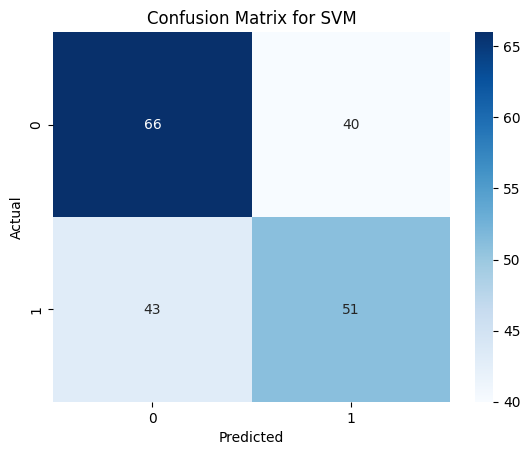

In [16]:
#  Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, Y_train)

# Predictions and Evaluation
y_pred_svm = svm_model.predict(X_test)

# Metrics for SVM
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_svm).ravel()
precision_svm = precision_score(Y_test, y_pred_svm)
recall_svm = recall_score(Y_test, y_pred_svm)
f1_svm = f1_score(Y_test, y_pred_svm)

print("\nSVM Evaluation:")
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)

# Confusion Matrix Visualization
sns.heatmap(confusion_matrix(Y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Evaluation:
Precision: 0.5842696629213483
Recall: 0.5531914893617021
F1 Score: 0.5683060109289617


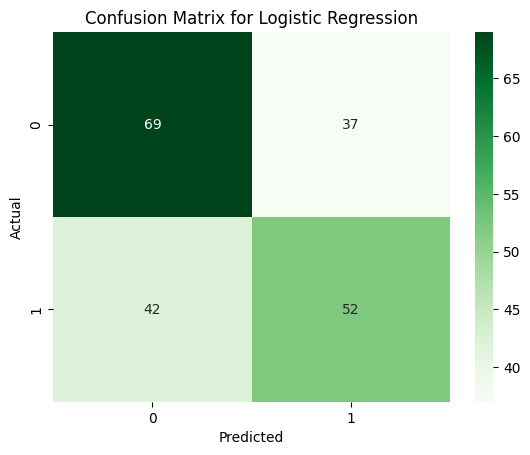

In [17]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)

# Predictions and Evaluation
y_pred_logistic = logistic_model.predict(X_test)

# Metrics for Logistic Regression
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_logistic).ravel()
precision_logistic = precision_score(Y_test, y_pred_logistic)
recall_logistic = recall_score(Y_test, y_pred_logistic)
f1_logistic = f1_score(Y_test, y_pred_logistic)

print("\nLogistic Regression Evaluation:")
print("Precision:", precision_logistic)
print("Recall:", recall_logistic)
print("F1 Score:", f1_logistic)

# Confusion Matrix Visualization for Logistic Regression
sns.heatmap(confusion_matrix(Y_test, y_pred_logistic), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


SVM Evaluation:
Precision: 0.5604395604395604
Recall: 0.5425531914893617
F1 Score: 0.5513513513513514


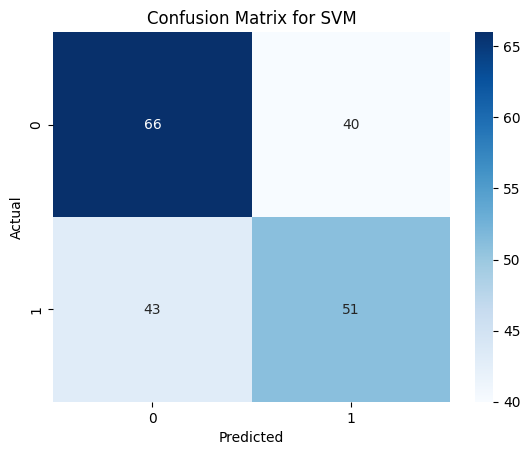

In [18]:
#  Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, Y_train)

# Predictions and Evaluation
y_pred_svm = svm_model.predict(X_test)

# Metrics for SVM
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_svm).ravel()
precision_svm = precision_score(Y_test, y_pred_svm)
recall_svm = recall_score(Y_test, y_pred_svm)
f1_svm = f1_score(Y_test, y_pred_svm)

print("\nSVM Evaluation:")
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1 Score:", f1_svm)

# Confusion Matrix Visualization
sns.heatmap(confusion_matrix(Y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

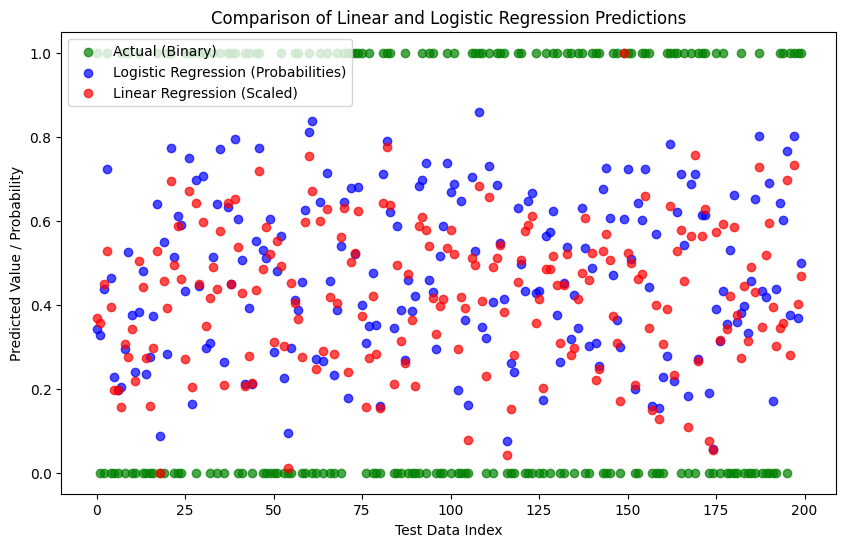

In [19]:
# Logistic Regression Predictions
y_pred_logistic_prob = logistic_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (1)

# Linear Regression Predictions (Rescaled to [0,1])
y_pred_lr_scaled = (y_pred_lr - min(y_pred_lr)) / (max(y_pred_lr) - min(y_pred_lr))

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.scatter(range(len(Y_test)), Y_test, color='green', label='Actual (Binary)', alpha=0.7)
plt.scatter(range(len(Y_test)), y_pred_logistic_prob, color='blue', label='Logistic Regression (Probabilities)', alpha=0.7)
plt.scatter(range(len(Y_test)), y_pred_lr_scaled, color='red', label='Linear Regression (Scaled)', alpha=0.7)

plt.title('Comparison of Linear and Logistic Regression Predictions')
plt.xlabel('Test Data Index')
plt.ylabel('Predicted Value / Probability')
plt.legend()
plt.show()